In [1]:
using Images
using Statistics
using LinearAlgebra
using MultivariateStats
function cargar_imagenes(carpeta)
    imagenes = []
    nombres_imagenes = []

    subcarpetas = readdir(carpeta)

    for subcarpeta in subcarpetas
        subcarpeta_ruta = joinpath(carpeta, subcarpeta)

        if isdir(subcarpeta_ruta)
            archivos = readdir(subcarpeta_ruta)

            for archivo in archivos
                if endswith(archivo, ".jpg")
                    ruta_completa = joinpath(subcarpeta_ruta, archivo)
                    imagen = load(ruta_completa)
                    imagen = Images.imresize(imagen, (100, 100))  # Redimensionar a 50x50 píxeles
                    imagen = Gray.(imagen)  # Convertir a escala de grises
                    imagen = convert(Array{Float64}, imagen)

                    push!(imagenes, imagen)
                    push!(nombres_imagenes, subcarpeta)  # Usar el nombre de la subcarpeta como etiqueta
                end
            end
        end
    end

    return imagenes, nombres_imagenes
end

# Cargar imágenes de entrenamiento desde la carpeta "faces" que contiene subcarpetas
imagenes_entrenamiento, nombres_entrenamiento = cargar_imagenes("faces")

# Armar la matriz de datos de entrenamiento
num_imagenes_entrenamiento = length(imagenes_entrenamiento)
matriz_de_datos_entrenamiento = zeros(Float64, num_imagenes_entrenamiento, 100 * 100)

for i in 1:num_imagenes_entrenamiento
    matriz_de_datos_entrenamiento[i, :] = vec(imagenes_entrenamiento[i])
end

# Calcular la media y centrar los datos de entrenamiento
media_entrenamiento = mean!(transpose(ones(100*100)),matriz_de_datos_entrenamiento)
matriz_centralizada_entrenamiento = matriz_de_datos_entrenamiento .- media_entrenamiento

# Calcular la matriz de covarianza y los autovectores de entrenamiento
matriz_covarianza_entrenamiento = cov(matriz_centralizada_entrenamiento)
autovalores_entrenamiento, autovectores_entrenamiento = eigen(matriz_covarianza_entrenamiento)

# Ordenar autovectores en orden descendente de acuerdo a sus autovalores de entrenamiento
idx_entrenamiento = sortperm(-autovalores_entrenamiento)
autovalores_entrenamiento = autovalores_entrenamiento[idx_entrenamiento]
autovectores_entrenamiento = autovectores_entrenamiento[:, idx_entrenamiento]

# Definir el número de componentes a retener (ajusta según sea necesario) para entrenamiento
num_componentes_entrenamiento = 20
autovectores_entrenamiento = autovectores_entrenamiento[:, 1:num_componentes_entrenamiento]

# Calcular las proyecciones de entrenamiento y reconstrucciones de entrenamiento
proyecciones_entrenamiento = matriz_centralizada_entrenamiento * autovectores_entrenamiento
reconstrucciones_entrenamiento = proyecciones_entrenamiento * autovectores_entrenamiento' .+ media_entrenamiento
mse = sum(abs2.(matriz_de_datos_entrenamiento .- reconstrucciones_entrenamiento)) / size(matriz_de_datos_entrenamiento, 1)
println("Error Cuadrático Medio (MSE): ", mse)




[68.32001578850674, 26.36622125734361, 17.681439578465547, 14.087818732617633, 10.677715002409073, 9.475907715845066, 8.525459063867133, 7.199911616713471, 6.401008459826006, 5.356582966332035, 4.0657537567329, 3.700992487787113, 2.975831088894682, 2.3994881751194876, 1.8614233102730473, 1.2587105501534155, 1.1307427004843786, 8.667924893538196e-14, 5.836647519815597e-14, 4.295390150080208e-14, 3.622021932015443e-14, 3.173082123232406e-14, 2.069896978568791e-14, 1.2059904330650007e-14, 8.410862279159278e-15, 6.054570460586216e-15, 6.0102222705539764e-15, 4.893581937216252e-15, 3.3156198861627376e-15, 3.161616678415906e-15, 2.778923502314307e-15, 2.6634906343264182e-15, 2.5652087459055208e-15, 2.4697782754771457e-15, 2.4575653800170247e-15, 2.343118116760908e-15, 2.2783919015930348e-15, 2.239954510580105e-15, 2.2393537571615287e-15, 2.205480238672424e-15, 2.039959141867518e-15, 1.6842770613867754e-15, 1.5272737516949163e-15, 1.4802214130652354e-15, 1.3418283914485774e-15, 1.282630194362

1.2169056948441352e-17, 1.2080919390921507e-17, 1.2051265743893464e-17, 1.1912574146292341e-17, 1.1881561000245358e-17, 1.168631450080499e-17, 1.1636446315487465e-17, 1.1598430402599103e-17, 1.1560733331617857e-17, 1.148997443125742e-17, 1.1486111109726859e-17, 1.1453351140132681e-17, 1.1368609827858048e-17, 1.1239944879267459e-17, 1.1193940440843622e-17, 1.1175855392130314e-17, 1.104978331862391e-17, 1.1016539930523252e-17, 1.0966300700928309e-17, 1.0957201375490027e-17, 1.0873408181840138e-17, 1.0735258526305056e-17, 1.0727109118959509e-17, 1.0650119191157479e-17, 1.06275090311374e-17, 1.0626289693656183e-17, 1.0578647867843356e-17, 1.05704138905993e-17, 1.0570341563362754e-17, 1.0566277415539858e-17, 1.0565862460091734e-17, 1.0481012229110575e-17, 1.0396005092716864e-17, 1.038827016908057e-17, 1.0316410596720453e-17, 1.0265581007396608e-17, 1.0257636657984697e-17, 1.0257354483592165e-17, 1.0248743568826856e-17, 1.024151078924914e-17, 1.0188398821463192e-17, 1.0148016045454722e-17, 1

, 4.168660463842933e-18, 4.166145314112393e-18, 4.1644016413131845e-18, 4.162703435590936e-18, 4.155046780620511e-18, 4.154372016471077e-18, 4.154152816171362e-18, 4.152395048577792e-18, 4.15167372476783e-18, 4.149986325730431e-18, 4.149665578525807e-18, 4.1446592556947055e-18, 4.1335902463351886e-18, 4.12838695445537e-18, 4.1250546001920414e-18, 4.123042091293606e-18, 4.1173832491142165e-18, 4.114256994757833e-18, 4.111389858793663e-18, 4.109155789930849e-18, 4.10257178432163e-18, 4.0904580165948e-18, 4.087521774225681e-18, 4.083202909866237e-18, 4.072592951508035e-18, 4.072347840677016e-18, 4.065560954247559e-18, 4.0622027730087165e-18, 4.045458516260763e-18, 4.0407769348540366e-18, 4.037502530185462e-18, 4.035958549973951e-18, 4.0324712814148615e-18, 4.0320223026245074e-18, 4.0311706963624395e-18, 4.028549328730863e-18, 4.024136608056424e-18, 4.017074650614444e-18, 4.016130082993165e-18, 4.014384949820706e-18, 4.013268288902325e-18, 4.013143523805428e-18, 4.010561850357936e-18, 4.00

 2.6421696647691577e-18, 2.64143473426304e-18, 2.6339610238671644e-18, 2.633861150176375e-18, 2.6327285544497783e-18, 2.6211851771358913e-18, 2.6171254009393365e-18, 2.6163380073170713e-18, 2.6157373099211978e-18, 2.615029070865364e-18, 2.6124806248368315e-18, 2.610050439249953e-18, 2.6099158332101668e-18, 2.60840740538628e-18, 2.6075266412924688e-18, 2.600827186860563e-18, 2.5987409119932205e-18, 2.5823284440437437e-18, 2.5792827028105338e-18, 2.5787056793446202e-18, 2.576122591515737e-18, 2.5761043966454093e-18, 2.574297652768565e-18, 2.574146379619388e-18, 2.5688796285243174e-18, 2.5678111916954298e-18, 2.564569015402085e-18, 2.5640801063565444e-18, 2.5522475418978588e-18, 2.5521521632998975e-18, 2.543231909127993e-18, 2.5369057069530697e-18, 2.5356272978744877e-18, 2.531481741942091e-18, 2.5304197181955627e-18, 2.527204010921199e-18, 2.5239572170434663e-18, 2.522330494715861e-18, 2.5186974148653403e-18, 2.5183556345281385e-18, 2.516996985133955e-18, 2.513276713682853e-18, 2.5128970

 1.5327206860240335e-18, 1.532146798007969e-18, 1.5319518441399528e-18, 1.5281566984435499e-18, 1.5243702926133706e-18, 1.5240492670826931e-18, 1.5218361721032767e-18, 1.5189393204222364e-18, 1.514955188897232e-18, 1.5141237411589154e-18, 1.5127333882790188e-18, 1.511338725380954e-18, 1.509748799735095e-18, 1.5082160515991565e-18, 1.5061549988983264e-18, 1.505936870732648e-18, 1.5017005125922885e-18, 1.501391972064921e-18, 1.4983505745661487e-18, 1.4980949052081137e-18, 1.4966233954015998e-18, 1.4959552441393762e-18, 1.4955909097931753e-18, 1.4938018712037072e-18, 1.4936641698352383e-18, 1.4933228786892213e-18, 1.4919266245733135e-18, 1.4909866431673453e-18, 1.4855942606508863e-18, 1.4827568353139948e-18, 1.4823081471367843e-18, 1.4816009259491505e-18, 1.4805945443562068e-18, 1.4779701663230295e-18, 1.477749270290938e-18, 1.4765942482576149e-18, 1.4760798985388806e-18, 1.4752083649885609e-18, 1.4734421401922196e-18, 1.4719756024678493e-18, 1.4594395468477194e-18, 1.458356275939496e-18,

 6.152404545308077e-19, 6.148842389292128e-19, 6.137263231212939e-19, 6.125871754991462e-19, 6.064237446790448e-19, 6.049469837679999e-19, 6.024586443552462e-19, 5.940301034224741e-19, 5.930713869085738e-19, 5.889350493809162e-19, 5.884837194427434e-19, 5.868586600082565e-19, 5.846989383070084e-19, 5.843275487466153e-19, 5.698562658136739e-19, 5.676977572736544e-19, 5.653109707896489e-19, 5.614018982441828e-19, 5.606294248051888e-19, 5.605378633093095e-19, 5.600085036992514e-19, 5.594560386591229e-19, 5.531034555882853e-19, 5.526780237291213e-19, 5.48005381163155e-19, 5.444231304286121e-19, 5.434239033568594e-19, 5.429376863688809e-19, 5.373129085809089e-19, 5.371751907399997e-19, 5.347357462890117e-19, 5.319556602615931e-19, 5.311612195964696e-19, 5.303335870000573e-19, 5.289803020543933e-19, 5.28455231662092e-19, 5.271637433569034e-19, 5.268232562259459e-19, 5.26409907241873e-19, 5.188810640965626e-19, 5.133118920538383e-19, 5.131368399710011e-19, 5.123918409414425e-19, 5.08590389159

, -3.055342850635485e-19, -3.0716163938722463e-19, -3.093090157366899e-19, -3.1591975148836764e-19, -3.162911630902988e-19, -3.1646690942894954e-19, -3.17678496663615e-19, -3.1825620719602937e-19, -3.1906254790185203e-19, -3.206136196692616e-19, -3.2443676610578724e-19, -3.2493820514960743e-19, -3.251174924546329e-19, -3.2513125321939005e-19, -3.2697868523682973e-19, -3.3494083481491355e-19, -3.3567425694264655e-19, -3.3661101302415944e-19, -3.3718861461836433e-19, -3.389851702231158e-19, -3.4258652575320603e-19, -3.4278486673216926e-19, -3.4885116306446755e-19, -3.490476601343782e-19, -3.5025760183181163e-19, -3.5287894838680107e-19, -3.534456377122984e-19, -3.595589707161874e-19, -3.631663673182168e-19, -3.6344783664547937e-19, -3.6455653327058604e-19, -3.687004426511973e-19, -3.6917664227831923e-19, -3.7399989917244255e-19, -3.7561501430966386e-19, -3.805990072829508e-19, -3.8144496969833614e-19, -3.8214158891880275e-19, -3.830351903069696e-19, -3.8425701622011136e-19, -3.8750524142

 -1.2754418047441644e-18, -1.2772125704736425e-18, -1.2777002403520349e-18, -1.2816778555168034e-18, -1.2824218821851748e-18, -1.2826375188563847e-18, -1.2891250411161708e-18, -1.290009298697226e-18, -1.2935928660677573e-18, -1.294632948487549e-18, -1.2946948949905925e-18, -1.3018648551387407e-18, -1.303327043279188e-18, -1.3058179014369427e-18, -1.3068217496000229e-18, -1.3078282363997412e-18, -1.3119954494756139e-18, -1.3132153764333746e-18, -1.3141923099880118e-18, -1.315558062236315e-18, -1.3159932399197595e-18, -1.3210996079369448e-18, -1.3224577380951939e-18, -1.3229926717284728e-18, -1.3236336868612987e-18, -1.3267903476729808e-18, -1.3291776210766513e-18, -1.3304743236025273e-18, -1.3315014292438432e-18, -1.3337338839680923e-18, -1.334168299344396e-18, -1.33625052263423e-18, -1.3372327003963237e-18, -1.3422632942830243e-18, -1.3433175105324574e-18, -1.3468618369041122e-18, -1.3511613148417512e-18, -1.3550446882190145e-18, -1.3572252358594123e-18, -1.358589336586895e-18, -1.3644

 -2.3445676322409813e-18, -2.3493063484133707e-18, -2.3577586097743924e-18, -2.3579973265478142e-18, -2.360994784610259e-18, -2.361466198548995e-18, -2.3621938895525032e-18, -2.363114492012739e-18, -2.3678216056869323e-18, -2.3740979061375275e-18, -2.3829552516663433e-18, -2.3848832246881402e-18, -2.3883461816443605e-18, -2.3890354006940163e-18, -2.3965772480306522e-18, -2.3967491837105717e-18, -2.399013007268442e-18, -2.4016782540504968e-18, -2.4039326763107023e-18, -2.4044087350461193e-18, -2.41521206275846e-18, -2.419417731434801e-18, -2.4207461775561393e-18, -2.4257847612756145e-18, -2.433876453420863e-18, -2.434287394812837e-18, -2.435413716977136e-18, -2.435771702985631e-18, -2.4399619073397465e-18, -2.4418492841047536e-18, -2.445655428930843e-18, -2.4467232716238777e-18, -2.4537569178209154e-18, -2.4544220434690287e-18, -2.4547510430778704e-18, -2.456077184987516e-18, -2.4616824437178966e-18, -2.4639180143495414e-18, -2.473213107061342e-18, -2.474956236551124e-18, -2.47856585730

 -3.872579959631558e-18, -3.875620629951768e-18, -3.8786448702803975e-18, -3.880355914972312e-18, -3.892639820225845e-18

, -3.896864612010576e-18, -3.900563866194498e-18, -3.910660210958536e-18, -3.91336639091997e-18, -3.918821440402326e-18, -3.9191039086448194e-18, -3.921686367379877e-18, -3.9269720081305734e-18, -3.931162550690784e-18, -3.936882855738852e-18, -3.95099171025497e-18, -3.9515789015609035e-18, -3.954881392533073e-18, -3.9639708557261644e-18, -3.965382145383815e-18, -3.970492023941762e-18, -3.97394776225697e-18, -3.974552380497998e-18, -3.982612748973646e-18, -3.9851410129381706e-18, -3.9854098300105176e-18, -3.992826607555897e-18, -4.0027598584503316e-18, -4.0040350435220935e-18, -4.0110140818736445e-18, -4.0140243682035194e-18, -4.015936161807049e-18, -4.034392556032713e-18, -4.041416793416274e-18, -4.062787421024983e-18, -4.0646100325184624e-18, -4.064936177189378e-18, -4.077119155501667e-18, -4.081830663058033e-18, -4.104396985739247e-18, -4.1070348229446615e-18, -4.108380257124241e-18, -4.113760132067973e-18, -4.119133674510326e-18, -4.123070693834838e-18, -4.125167332947792e-18, -4.12

, -9.058854709230097e-18, -9.097942183736295e-18, -9.174780508248694e-18, -9.18713821491681e-18, -9.214447980375668e-18, -9.234408372635793e-18, -9.307011817098256e-18, -9.424013469833483e-18, -9.45272116014834e-18, -9.473206842446881e-18, -9.525796736921643e-18, -9.538967993791098e-18, -9.694626884516953e-18, -9.90056136420521e-18, -9.90426779316595e-18, -9.960256661503558e-18, -1.0019701150313463e-17, -1.0137494602063889e-17, -1.019643502391535e-17, -1.0334278254898402e-17, -1.0422199519464287e-17, -1.0467119102810019e-17, -1.0679496789716378e-17, -1.077354808358526e-17, -1.0794559971044163e-17, -1.0812534184981781e-17, -1.0852757692855428e-17, -1.0866238602383384e-17, -1.0940693286085764e-17, -1.0991198592179658e-17, -1.1045954157509101e-17, -1.1128153703583387e-17, -1.1139322514280109e-17, -1.1171528468639336e-17, -1.137888162623659e-17, -1.1403354545750844e-17, -1.1407368181703523e-17, -1.1430579132404218e-17, -1.1453601176631232e-17, -1.1485058146732242e-17, -1.1672478724471003e-

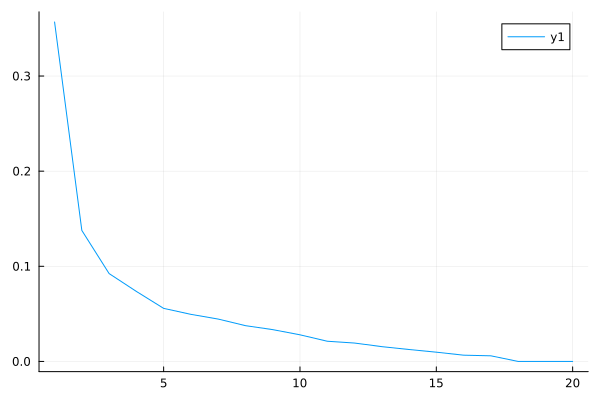

In [37]:
print(autovalores_entrenamiento)

sorted_values=sort(autovalores_entrenamiento ,rev=true);
length(sorted_values)
using Plots;

sorted_values=sorted_values./sum(sorted_values)
plot(sorted_values[1:20])

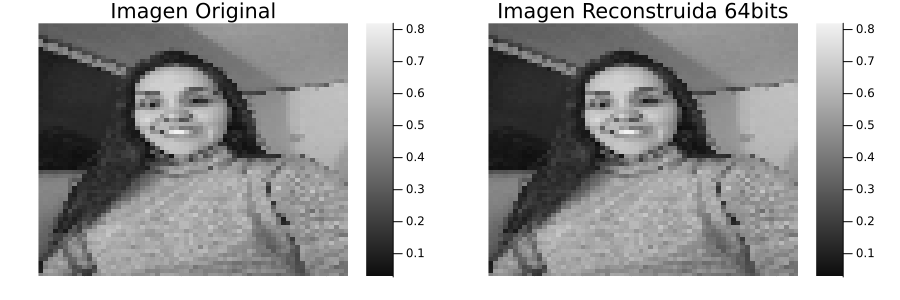

In [2]:
using Plots

# Índice de la imagen que deseas mostrar (ajusta según sea necesario)
indice_a_mostrar = 1# Cambia este índice para mostrar una imagen diferente

# Obtén la imagen original y su reconstrucción
imagen_original = reverse(reshape(matriz_de_datos_entrenamiento[indice_a_mostrar, :], 100, 100), dims=1)  # Ajusta el tamaño según tus imágenes y voltea verticalmente
imagen_reconstruida = reverse(reshape(reconstrucciones_entrenamiento[indice_a_mostrar, :], 100, 100), dims=1)  # Ajusta el tamaño según tus imágenes y voltea verticalmente

# Crea una figura con subfiguras para mostrar las imágenes
plot(
    heatmap(imagen_original, color=:grays, axis=false, title="Imagen Original"),
    heatmap(imagen_reconstruida, color=:grays, axis=false, title="Imagen Reconstruida 64bits"),
    layout=(1, 2),
    size=(900, 300)
)

In [3]:
# Prueba
# Cargar imágenes de prueba desde la carpeta "test"
imagenes_prueba, nombres_prueba = cargar_imagenes("faces/prueba")
# Armar la matriz de datos de prueba
num_imagenes_prueba = length(imagenes_prueba)
matriz_de_datos_prueba = zeros(Float64, num_imagenes_prueba, 100 * 100)

for i in 1:num_imagenes_prueba
    matriz_de_datos_prueba[i, :] = vec(imagenes_prueba[i])
end

# Calcular la proyección de cada imagen de prueba en el espacio de las componentes principales de entrenamiento
proyecciones_prueba = (matriz_de_datos_prueba .- media_entrenamiento) * autovectores_entrenamiento

# Inicializar un vector para almacenar las etiquetas predichas
etiquetas_predichas = []

# Inicializar un vector para almacenar las distancias mínimas
distancias_minimas = []

# Para cada imagen de prueba
for i in 1:num_imagenes_prueba
    distancia_minima = Inf
    etiqueta_predicha = ""

    # Calcular la distancia entre la proyección de la imagen de prueba y las proyecciones de entrenamiento
    for j in 1:num_imagenes_entrenamiento
        distancia = norm(proyecciones_prueba[i, :] - proyecciones_entrenamiento[j, :])
        
        # Almacenar la distancia mínima
        if distancia < distancia_minima
            distancia_minima = distancia
            etiqueta_predicha = nombres_entrenamiento[j]
        end
    end
    # Almacenar la etiqueta predicha y la distancia mínima
    push!(etiquetas_predichas, etiqueta_predicha)
    push!(distancias_minimas, distancia_minima)
end

# Imprimir las etiquetas predichas para las imágenes de prueba
println("Etiquetas Predichas: ", etiquetas_predichas)

# Imprimir las distancias mínimas para las imágenes de prueba
println("Distancias Mínimas: ", distancias_minimas[1])




Etiquetas Predichas: Any

["Marcelo Jara"]
Distancias Mínimas: 8.270151019641053


In [48]:
indice_parecida = findfirst(nombres_entrenamiento .== etiquetas_predichas)
imagen_parecida = reverse(reshape(matriz_de_datos_entrenamiento[indice_parecida, :], 100, 100), dims=1)

64×64 Matrix{Float64}:
 0.27451   0.270588  0.301961  0.227451  …  0.231373  0.313725  0.301961
 0.368627  0.368627  0.278431  0.321569     0.258824  0.301961  0.278431
 0.278431  0.262745  0.376471  0.321569     0.270588  0.294118  0.294118
 0.341176  0.313725  0.317647  0.32549      0.298039  0.231373  0.294118
 0.360784  0.321569  0.231373  0.345098     0.337255  0.262745  0.313725
 0.356863  0.392157  0.309804  0.188235  …  0.266667  0.254902  0.32549
 0.396078  0.376471  0.356863  0.392157     0.231373  0.282353  0.301961
 0.345098  0.239216  0.356863  0.321569     0.270588  0.309804  0.341176
 0.360784  0.380392  0.309804  0.266667     0.286275  0.282353  0.368627
 0.32549   0.384314  0.372549  0.333333     0.278431  0.392157  0.380392
 ⋮                                       ⋱                      
 0.160784  0.160784  0.168627  0.160784  …  0.203922  0.196078  0.196078
 0.180392  0.168627  0.172549  0.160784     0.203922  0.207843  0.207843
 0.164706  0.176471  0.180392  0.1450

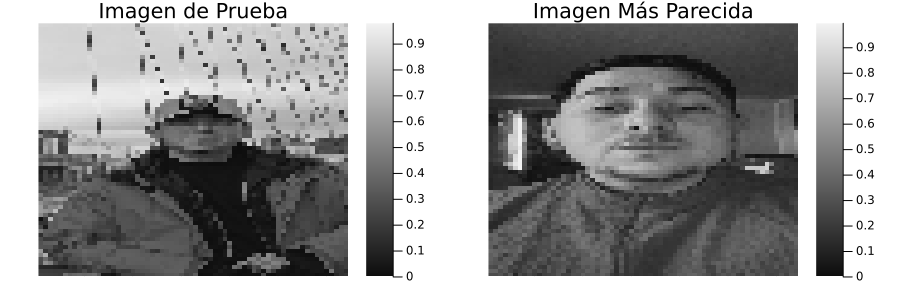

In [50]:
using Plots


imagen_original = reverse(reshape(matriz_de_datos_prueba, 100, 100), dims=1)  # Ajusta el tamaño según tus imágenes y voltea verticalmente
imagen_parecida = reverse(reshape(matriz_de_datos_entrenamiento[indice_parecida, :], 100, 100), dims=1)  # Ajusta el índice según la imagen más parecida

# Crea una figura con subfiguras para mostrar las imágenes
plot(
    heatmap(imagen_original, color=:grays, axis=false, title="Imagen de Prueba"),
    heatmap(imagen_parecida, color=:grays, axis=false, title="Imagen Más Parecida"),
    layout=(1, 2),
    size=(900, 300)
)


revisar las dimensiones que necestamos porque aca se utilzan 2 y la matriz de covarianza pude entregar una matriz mas grande parece...menor dimensionalidad en este caso es de 3x3 ...puede que este mal mi ejercicio wn...matriz de componentes principales ...sacar raiz de la matriz ...la wea de reconstruccion